In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
from hydra.utils import instantiate
from hydra import initialize, compose
import hydra

from data.dataManager import DataManager
from model.modelCreator import ModelCreator
from omegaconf import OmegaConf
from scripts.run import setup_model, load_model_instance

[22:24:40.453] INFO   CaloQuVAE                                         Loading configuration.
[22:24:41.945] INFO   CaloQVAE                                          Willkommen!
[22:24:41.946] INFO   CaloQVAE                                          Loading configuration.


In [2]:
hydra.core.global_hydra.GlobalHydra.instance().clear()
initialize(version_base=None, config_path="config")
config=compose(config_name="config.yaml")

In [3]:
new_model = False
if new_model:
    self = setup_model(config)
    # self.model = self.model.double()  # sets all model parameters to float64
else:
    self = load_model_instance(config.config_path)
    # self.model = self.model.double()
self._config.wandb.watch = 0

[22:24:42.816] INFO   data.dataManager                                  Keys: ['incident_energies', 'showers']
[22:24:45.935] INFO   data.dataManager                                  dict_keys(['incident_energies', 'showers'])
[22:24:45.937] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f0c5a2435f0>: 101816 events, 796 batches
[22:24:45.937] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f0c5a08a990>: 12728 events, 13 batches
[22:24:45.938] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f0c5a95e540>: 12727 events, 13 batches
[22:24:45.938] INFO   model.modelCreator                                ::Creating Model
[22:24:46.178] INFO   dwave.cloud.client.base                           Fetching definitions of all available solvers
[22:24:46.219] INFO   dwave.cloud.client.base                           

cuda:1


[22:24:48.295] INFO   scripts.run                                       Model NOT being watched by wandb
[22:24:49.379] INFO   model.modelCreator                                Loading state
[22:24:49.525] INFO   model.modelCreator                                Loading weights from file : /fast_scratch_1/caloqvae/jtoledo/wandb/run-20250702_212524-kqu1hwdb/files/autoencoderbase_0.pth


encoder._networks.0.seq1.0.conv.weight True
encoder._networks.0.seq1.0.conv.bias True
encoder._networks.0.seq1.1.weight True
encoder._networks.0.seq1.1.bias True
encoder._networks.0.seq1.2.weight True
encoder._networks.0.seq1.3.conv.weight True
encoder._networks.0.seq1.3.conv.bias True
encoder._networks.0.seq1.4.weight True
encoder._networks.0.seq1.4.bias True
encoder._networks.0.seq1.5.weight True
encoder._networks.0.seq2.0.conv.weight True
encoder._networks.0.seq2.0.conv.bias True
encoder._networks.0.seq2.1.weight True
encoder._networks.0.seq2.1.bias True
encoder._networks.0.seq2.2.weight True
encoder._networks.0.seq2.3.conv.weight True
encoder._networks.0.seq2.3.conv.bias True
encoder._networks.0.seq2.4.weight True
encoder._networks.1.seq1.0.conv.weight True
encoder._networks.1.seq1.0.conv.bias True
encoder._networks.1.seq1.1.weight True
encoder._networks.1.seq1.1.bias True
encoder._networks.1.seq1.2.weight True
encoder._networks.1.seq1.3.conv.weight True
encoder._networks.1.seq1.3.

In [4]:
self.evaluate(self.data_mgr.test_loader, 0)

In [6]:
# self.post_samples

In [9]:
engine.model.prior.energy_exp(
    post_samples[0].to(dtype=torch.float),
    post_samples[1],
    post_samples[2],
    post_samples[3]
)

tensor(25.9604, device='cuda:1', grad_fn=<MeanBackward0>)

In [22]:
from model.rbm.zephyr import ZephyrRBM, ZephyrRBM_Old

In [ ]:
config.rbm.latent_nodes_per_p=512
new = ZephyrRBM(config)
old = ZephyrRBM_Old(config)

binwidth = 1.0
new_data, old_data = {}, {}
for key in new.weight_dict.keys():
    # data[key] = engine.model.prior.weight_dict[key].sign().abs().sum(dim=0).detach().cpu().numpy()
    new_data[key] = new._weight_mask_dict[key].abs().sum(dim=0).cpu().numpy()
for key in old.weight_dict.keys():
    old_data[key] = old._weight_mask_dict[key].abs().sum(dim=0).cpu().numpy()
    


[19:30:44.060] INFO   dwave.cloud.client.base                           Fetching definitions of all available solvers


[19:30:44.245] INFO   dwave.cloud.client.base                           Received solver data for 7 solver(s).
[19:30:44.622] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage_system4.1')
[19:30:44.684] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage_system6.4')
[19:30:44.760] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage2_system1.3')


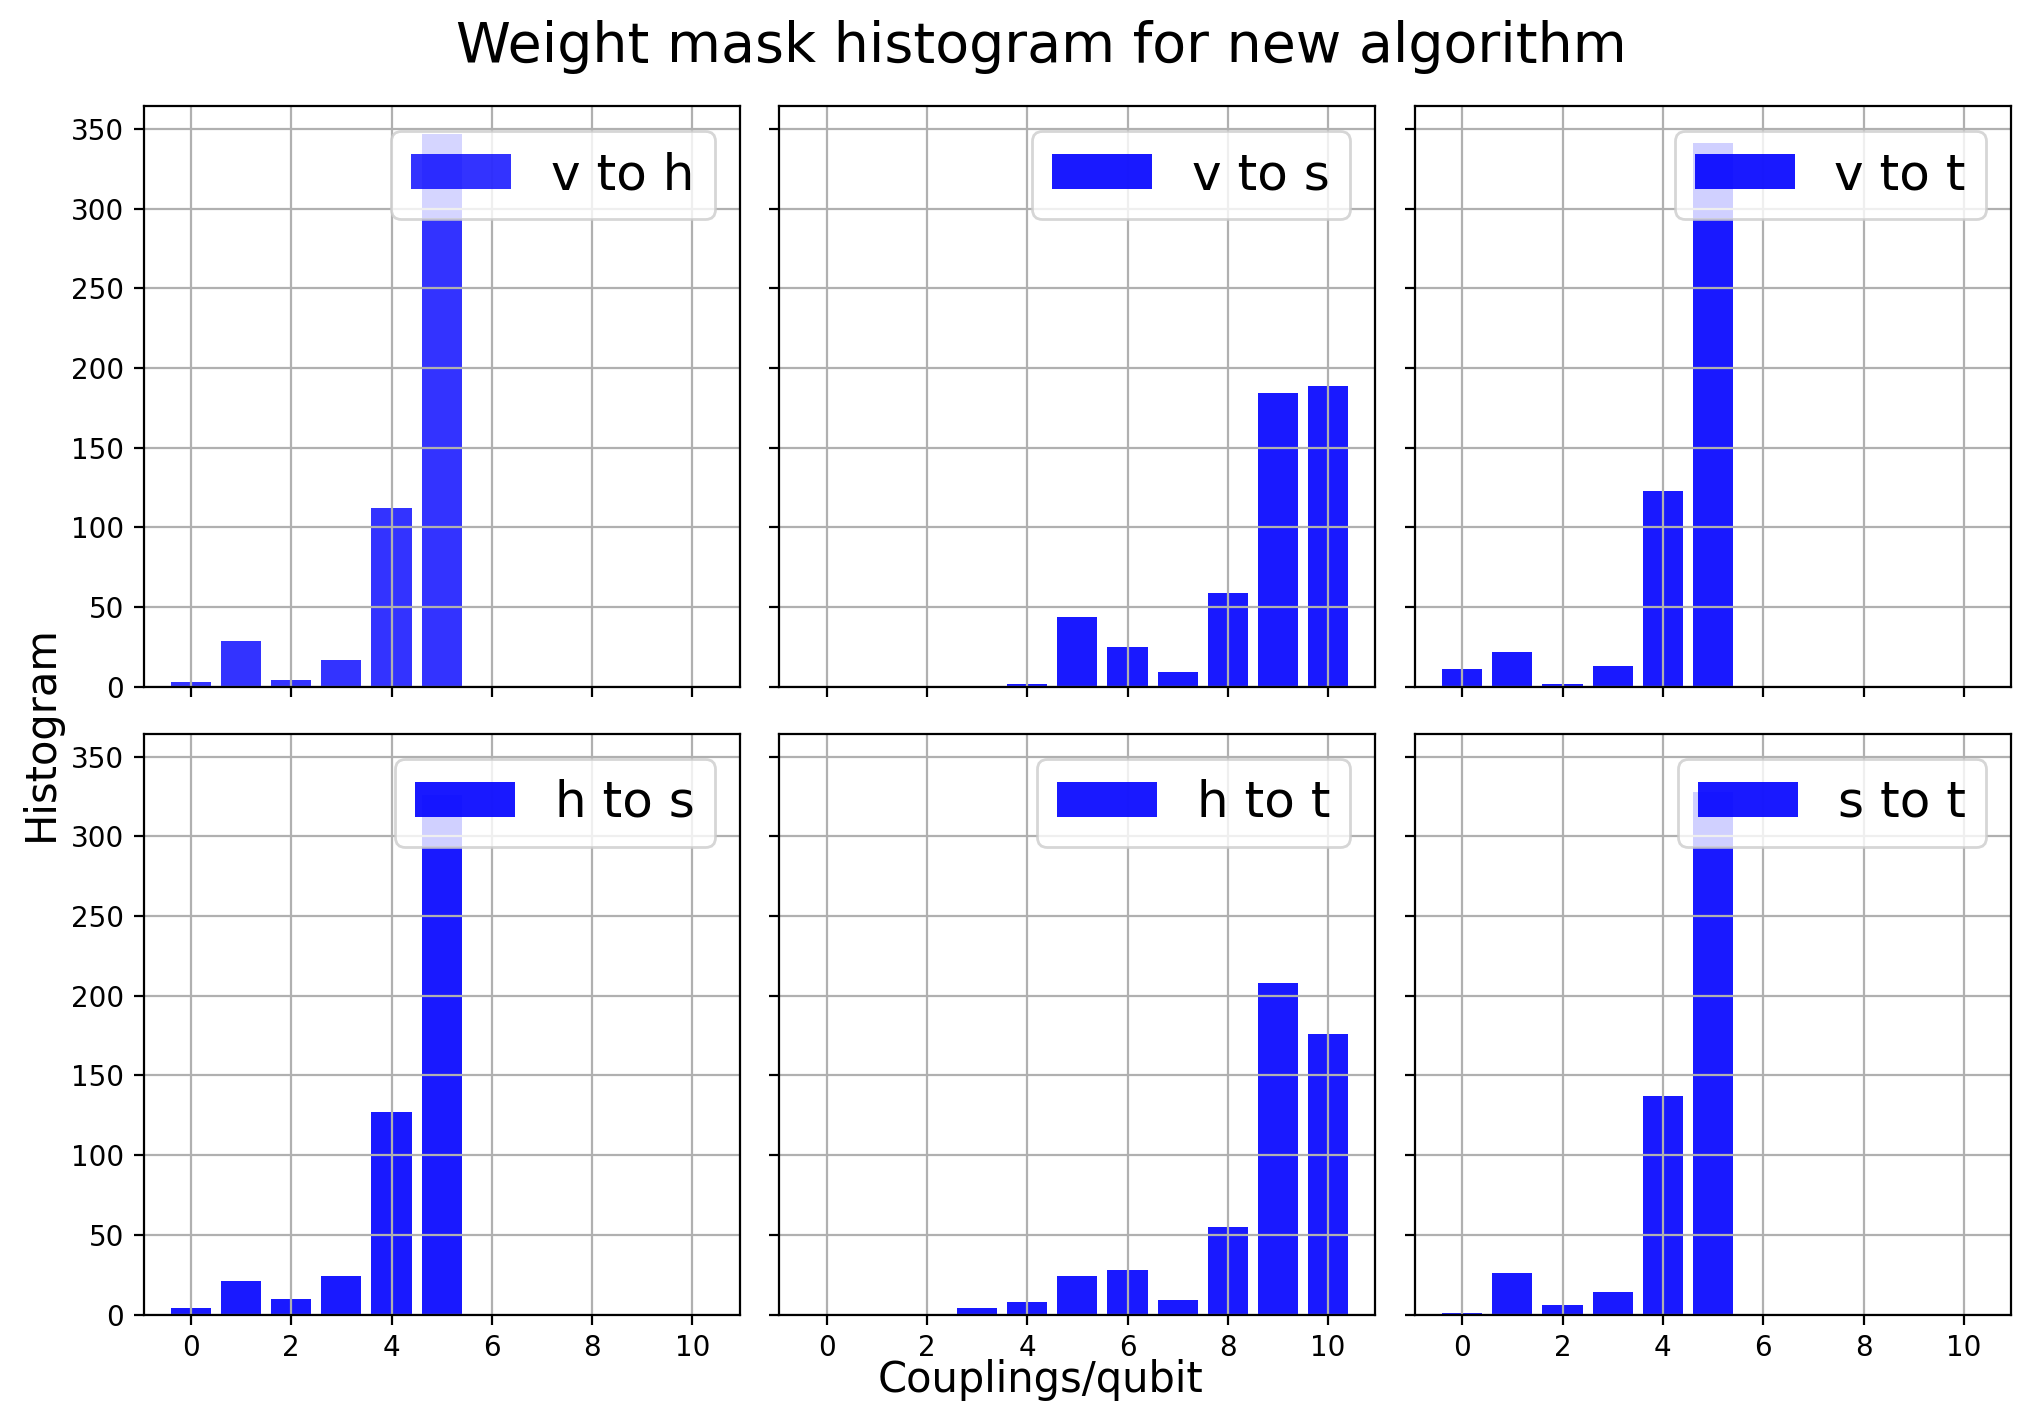

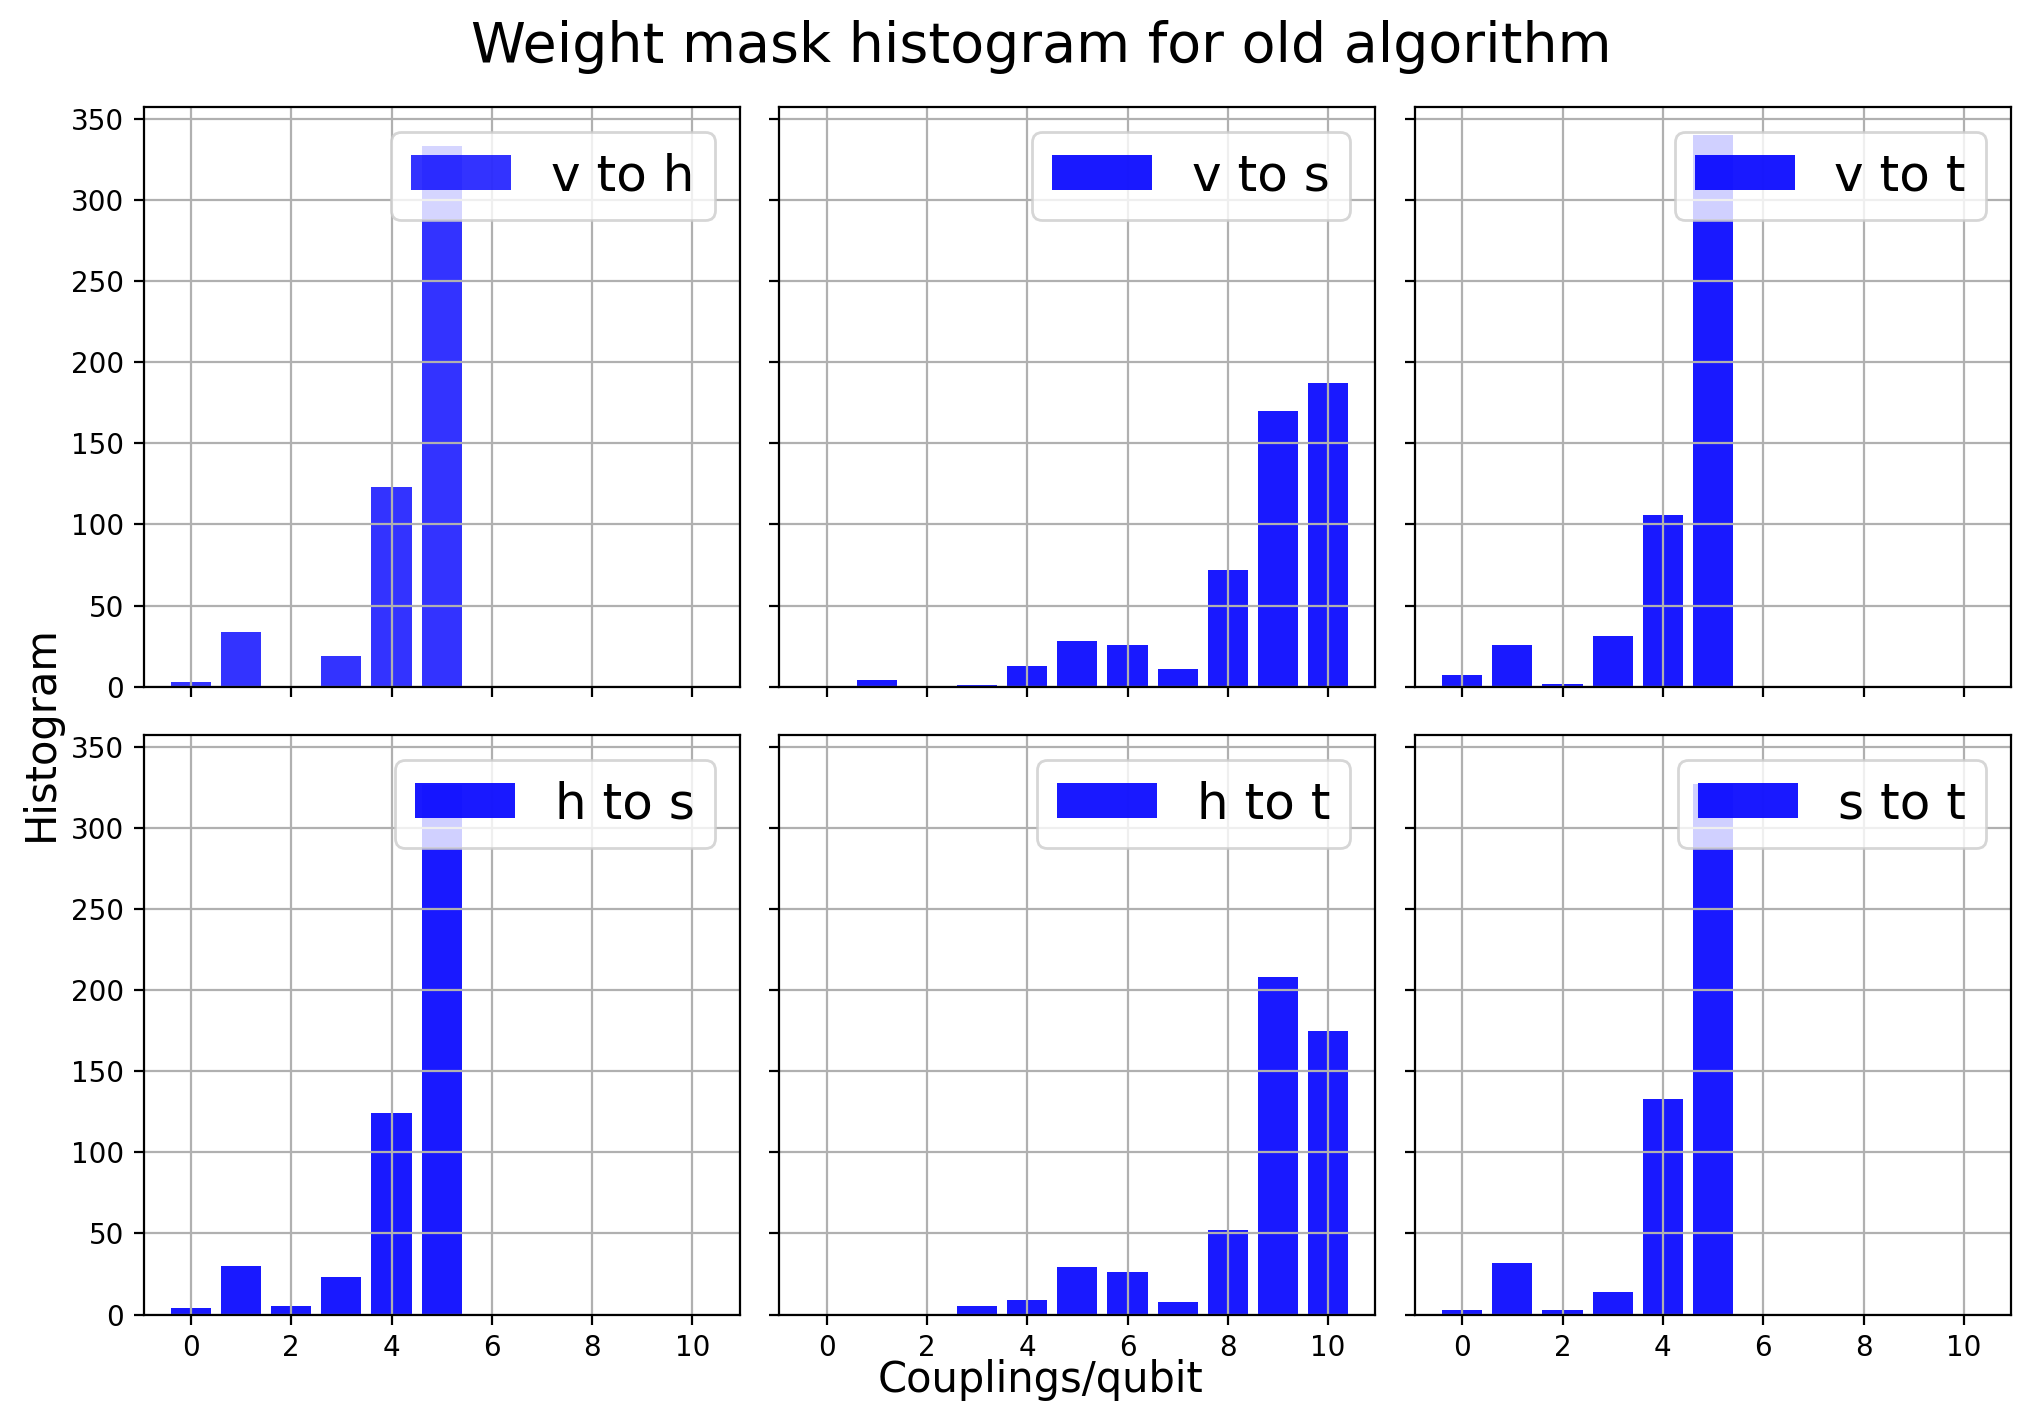

In [7]:
def plot_weights(data, label):
    # Create 2x2 grid of subplots
    fig, axs = plt.subplots(2, 3, figsize=(10, 7), sharey=True, sharex=True, tight_layout=True)  # 2x2 grid, figure size 10x10
    fig.text(0.5, 0.0, 'Couplings/qubit', ha='center', fontsize=15)
    fig.text(0.0, 0.4, 'Histogram', rotation=90, ha='center', fontsize=15)

    # Plot data on each subplot
    labels, counts = np.unique(data['01'], return_counts=True)
    axs[0,0].bar(labels, counts, align='center', color="b", alpha=0.8)
    # axs[0, 0].hist(data['01'], bins=np.arange(min(data['01']), max(data['01']) + binwidth, binwidth), histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, align='center')
    axs[0,0].grid("True")
    axs[0,0].legend(["v to h"], fontsize=18)

    labels, counts = np.unique(data['02'], return_counts=True)
    axs[0,1].bar(labels, counts, align='center', color="b", alpha=0.9)
    axs[0,1].grid("True")
    axs[0,1].legend(["v to s"], fontsize=18)

    labels, counts = np.unique(data['03'], return_counts=True)
    axs[0,2].bar(labels, counts, align='center', color="b", alpha=0.9)
    axs[0,2].grid("True")
    axs[0,2].legend(["v to t"], fontsize=18)

    labels, counts = np.unique(data['12'], return_counts=True)
    axs[1,0].bar(labels, counts, align='center', color="b", alpha=0.9)
    axs[1,0].grid("True")
    axs[1,0].legend(["h to s"], fontsize=18)

    labels, counts = np.unique(data['13'], return_counts=True)
    axs[1,1].bar(labels, counts, align='center', color="b", alpha=0.9)
    axs[1,1].grid("True")
    axs[1,1].legend(["h to t"], fontsize=18)

    labels, counts = np.unique(data['23'], return_counts=True)
    axs[1,2].bar(labels, counts, align='center', color="b", alpha=0.9)
    axs[1,2].grid("True")
    axs[1,2].legend(["s to t"], fontsize=18)

    # plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/weights_plot_zephyr.png', bbox_inches="tight")
    plt.suptitle(f"Weight mask histogram for {label}", fontsize=20)

    plt.show()
plot_weights(new_data, "new algorithm")
plot_weights(old_data, "old algorithm")

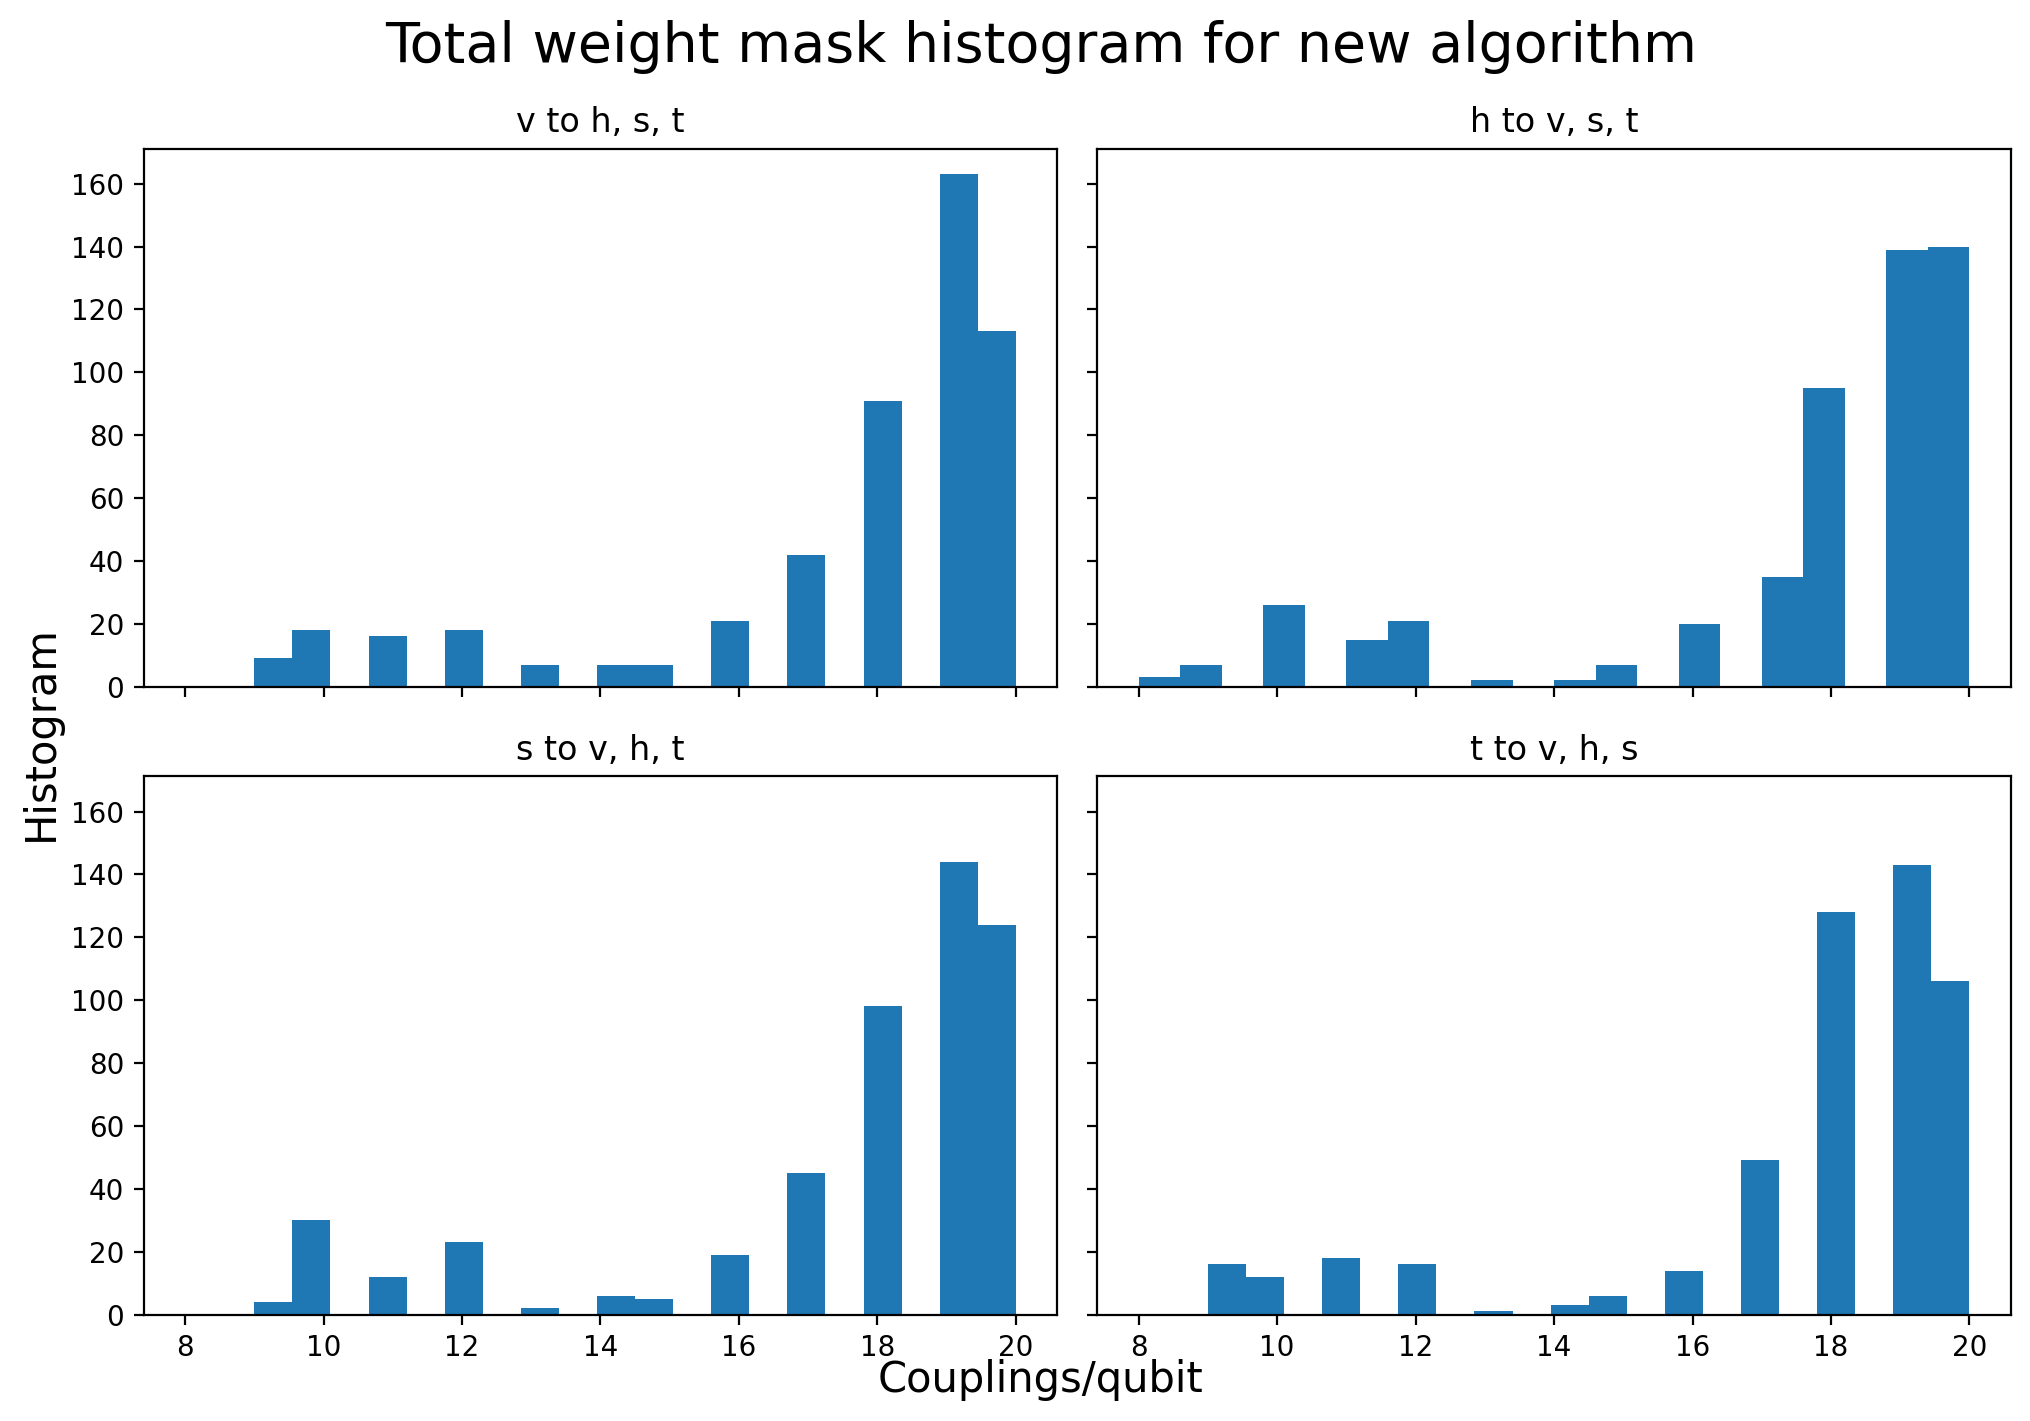

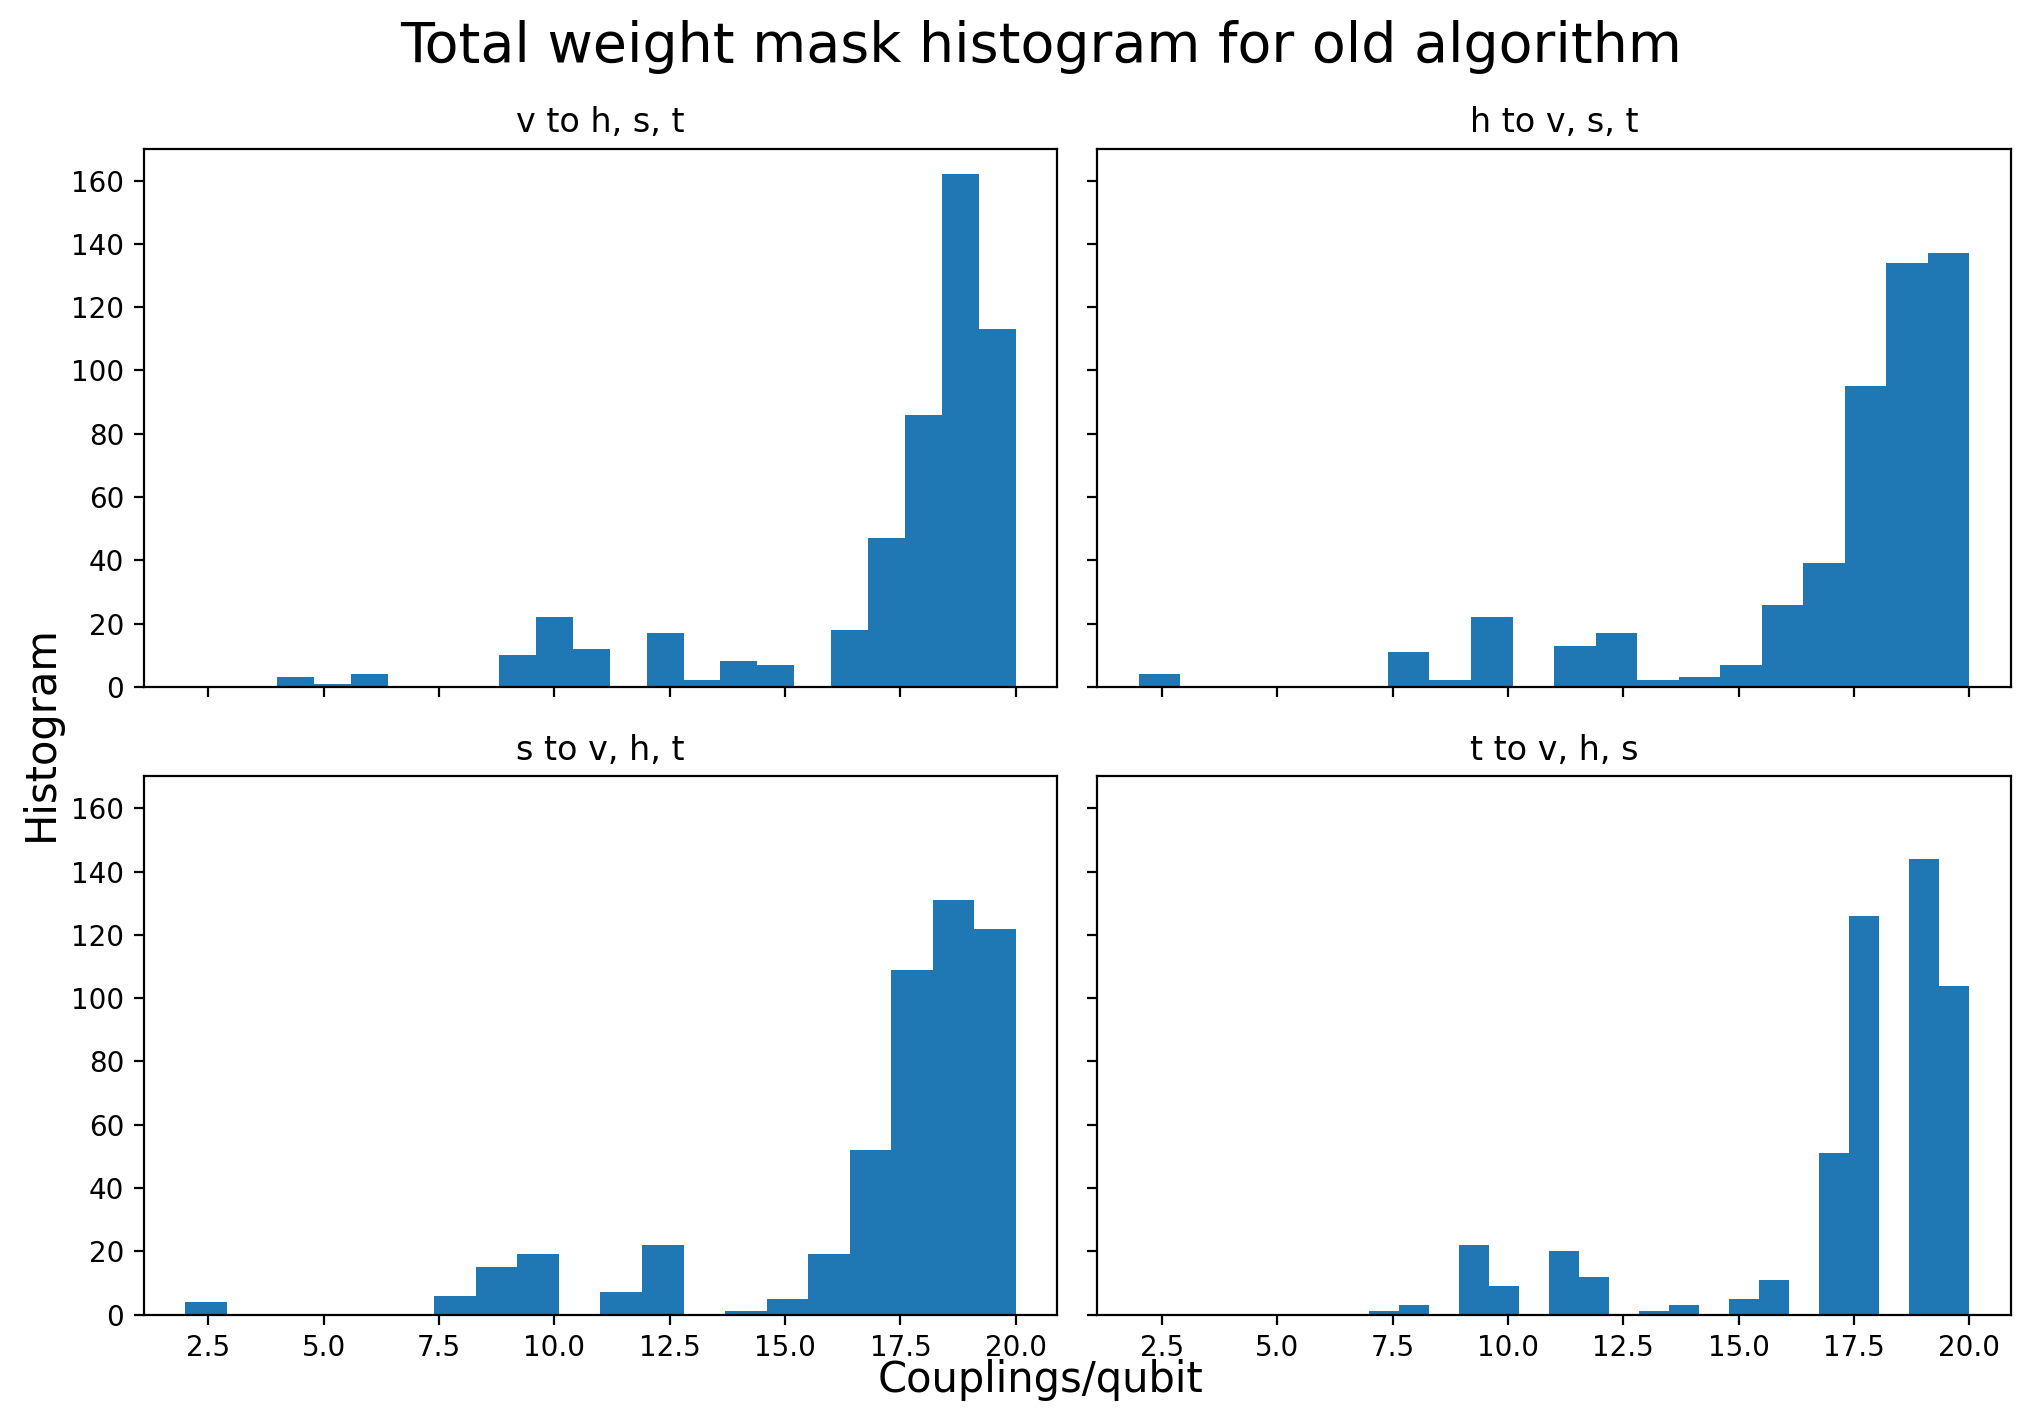

In [8]:
zph = new
# plt.hist(torch.cat((zph._weight_mask_dict['01'],zph._weight_mask_dict['02'],zph._weight_mask_dict['03']),1).sum(dim=1).numpy(), bins=20)
# plt.show()
# plt.hist(torch.cat((zph._weight_mask_dict['01'].transpose(1,0),zph._weight_mask_dict['12'],zph._weight_mask_dict['13']),1).sum(dim=1), bins=20)
# plt.show()
# plt.hist(torch.cat((zph._weight_mask_dict['02'].transpose(1,0),zph._weight_mask_dict['12'].transpose(1,0),zph._weight_mask_dict['23']),1).sum(dim=1), bins=20)
# plt.show()
# plt.hist(torch.cat((zph._weight_mask_dict['03'].transpose(1,0),zph._weight_mask_dict['13'].transpose(1,0),zph._weight_mask_dict['23'].transpose(1,0)),1).sum(dim=1), bins=20)
# plt.show()
def plot_total_weights(zeph, label):
    fig, ax = plt.subplots(2, 2, figsize=(10, 7), sharey=True, sharex=True, tight_layout=True)  # 2x2 grid, figure size 10x10
    fig.text(0.5, 0.0, 'Couplings/qubit', ha='center', fontsize=15)
    fig.text(0.0, 0.4, 'Histogram', rotation=90, ha='center', fontsize=15)
    ax[0, 0].hist(torch.cat((zeph._weight_mask_dict['01'], zeph._weight_mask_dict['02'], zeph._weight_mask_dict['03']), 1).sum(dim=1).numpy(), bins=20)
    ax[0, 0].set_title("v to h, s, t")
    ax[0, 1].hist(torch.cat((zeph._weight_mask_dict['01'].transpose(1,0), zeph._weight_mask_dict['12'], zeph._weight_mask_dict['13']), 1).sum(dim=1), bins=20)
    ax[0, 1].set_title("h to v, s, t")
    ax[1, 0].hist(torch.cat((zeph._weight_mask_dict['02'].transpose(1,0), zeph._weight_mask_dict['12'].transpose(1,0), zeph._weight_mask_dict['23']), 1).sum(dim=1), bins=20)
    ax[1, 0].set_title("s to v, h, t")
    ax[1, 1].hist(torch.cat((zeph._weight_mask_dict['03'].transpose(1,0), zeph._weight_mask_dict['13'].transpose(1,0), zeph._weight_mask_dict['23'].transpose(1,0)), 1).sum(dim=1), bins=20)
    ax[1, 1].set_title("t to v, h, s")
    fig.suptitle(f"Total weight mask histogram for {label}", fontsize=20)

plot_total_weights(new, "new algorithm")
plot_total_weights(old, "old algorithm")

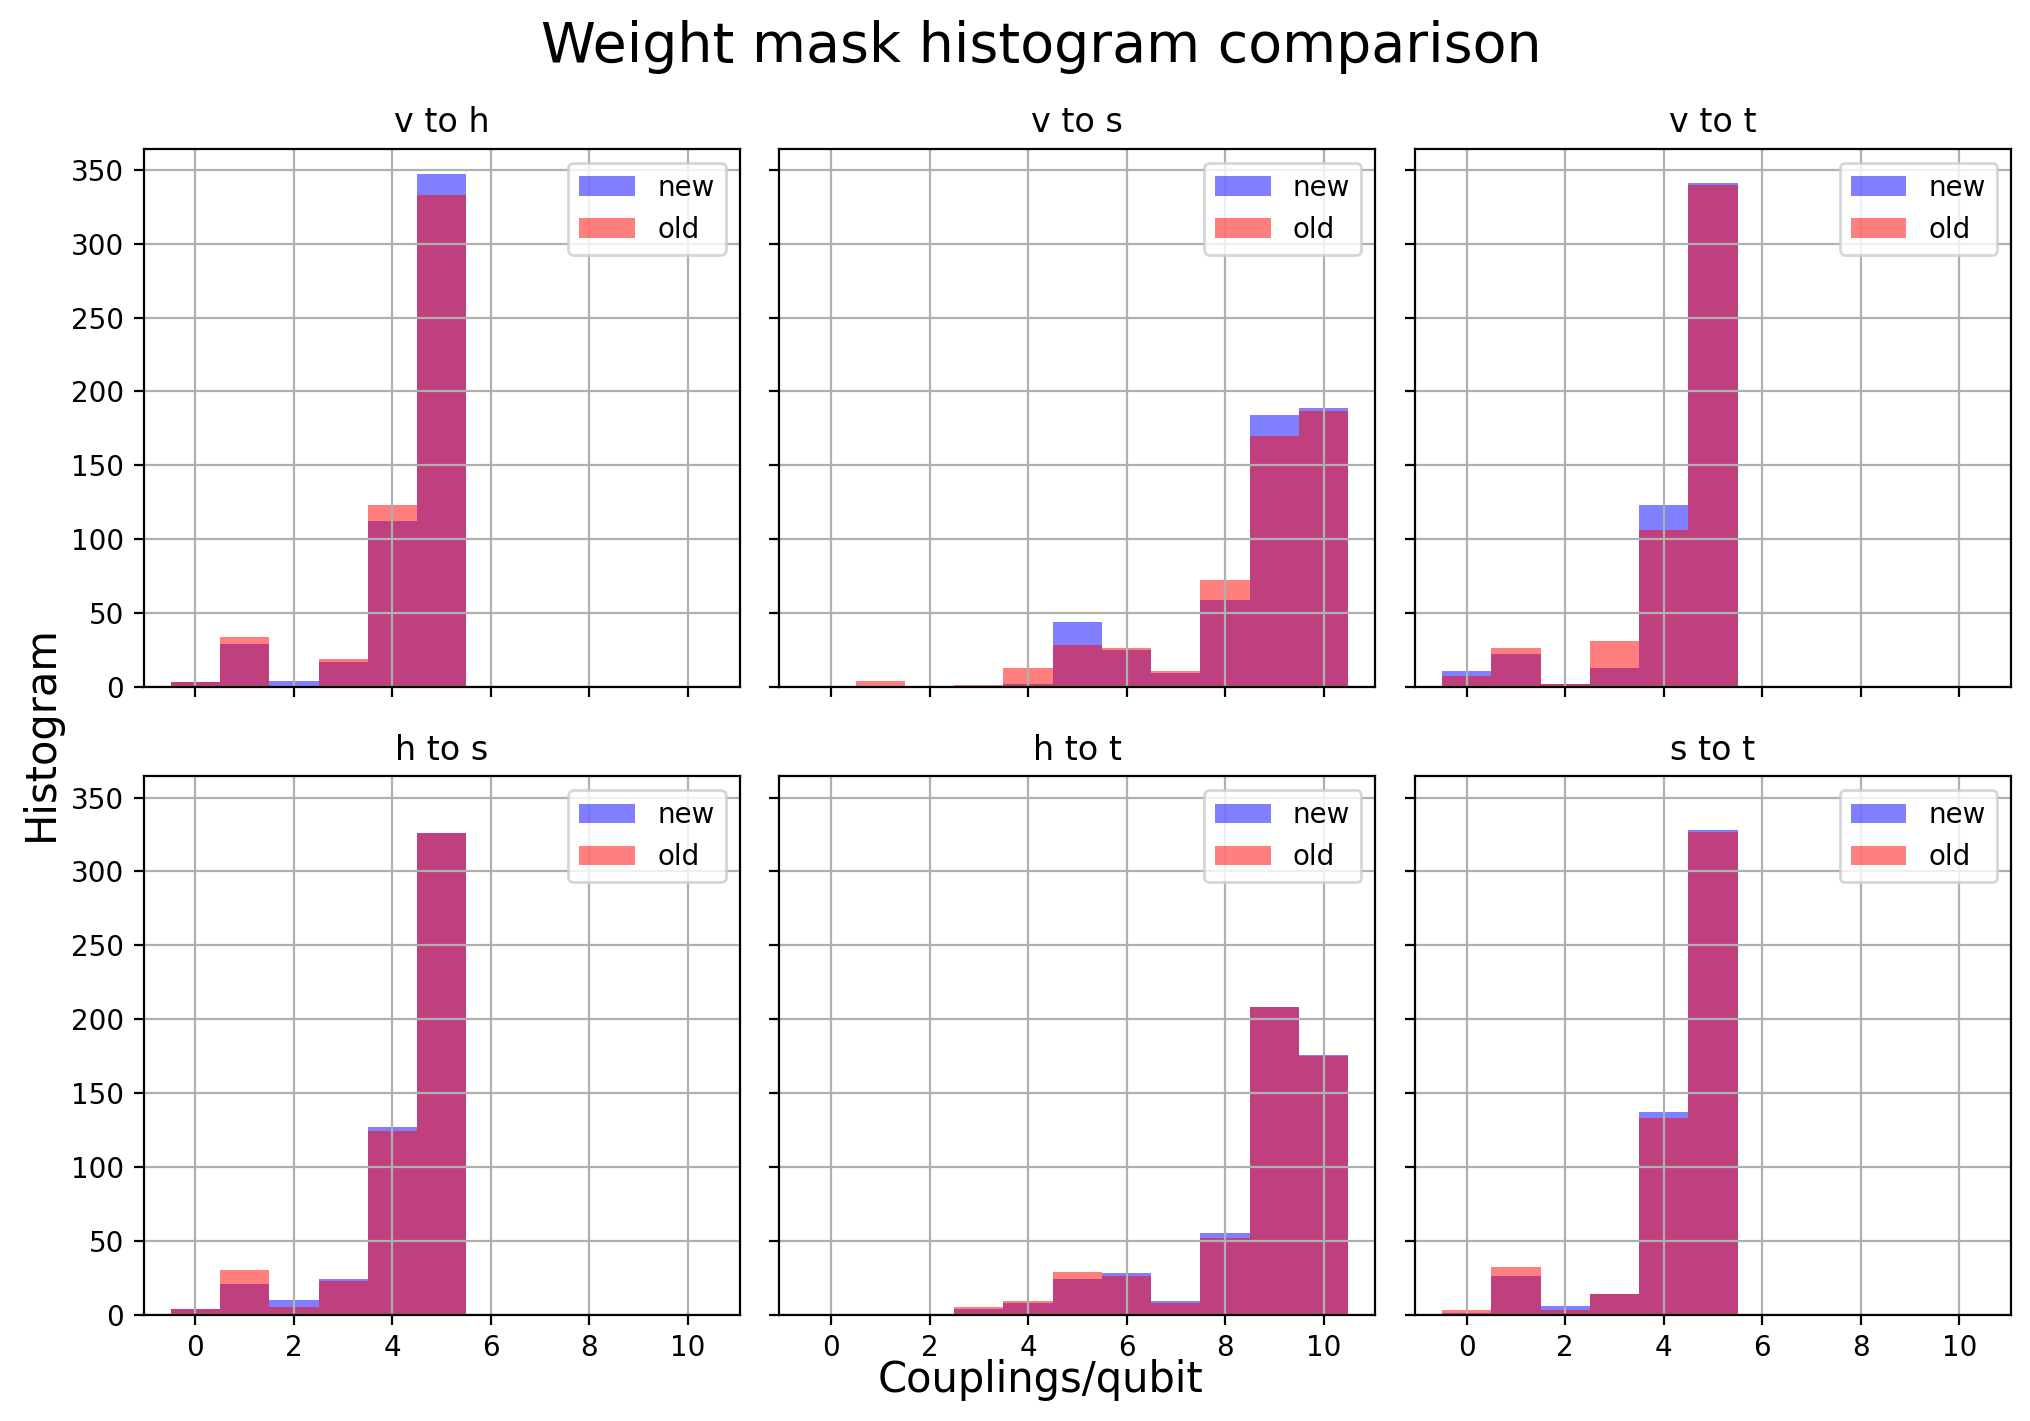

In [ ]:
def plot_weights_overlay(new_data, old_data):
    fig, axs = plt.subplots(2, 3, figsize=(10, 7), sharey=True, sharex=True, tight_layout=True)
    fig.text(0.5, 0.0, 'Couplings/qubit', ha='center', fontsize=15)
    fig.text(0.0, 0.4, 'Histogram', rotation=90, ha='center', fontsize=15)

    keys = ['01', '02', '03', '12', '13', '23']
    titles = ["v to h", "v to s", "v to t", "h to s", "h to t", "s to t"]
    
    for i, key in enumerate(keys):
        ax = axs[i // 3, i % 3]
        data_new = new_data[key]
        data_old = old_data[key]
        # Determine bin edges to align histograms, centering on integers
        min_val = min(data_new.min(), data_old.min())
        max_val = max(data_new.max(), data_old.max())
        bins = np.arange(min_val, max_val + 2) - 0.5  # Shift by 0.5 to center bins on integers
        ax.hist(data_new, bins=bins, alpha=0.5, label='new', color='blue')
        ax.hist(data_old, bins=bins, alpha=0.5, label='old', color='red')
        ax.legend()
        ax.set_title(titles[i])
        ax.grid(True)

    plt.suptitle("Weight mask histogram comparison", fontsize=20)
    plt.show()
plot_weights_overlay(new_data, old_data)

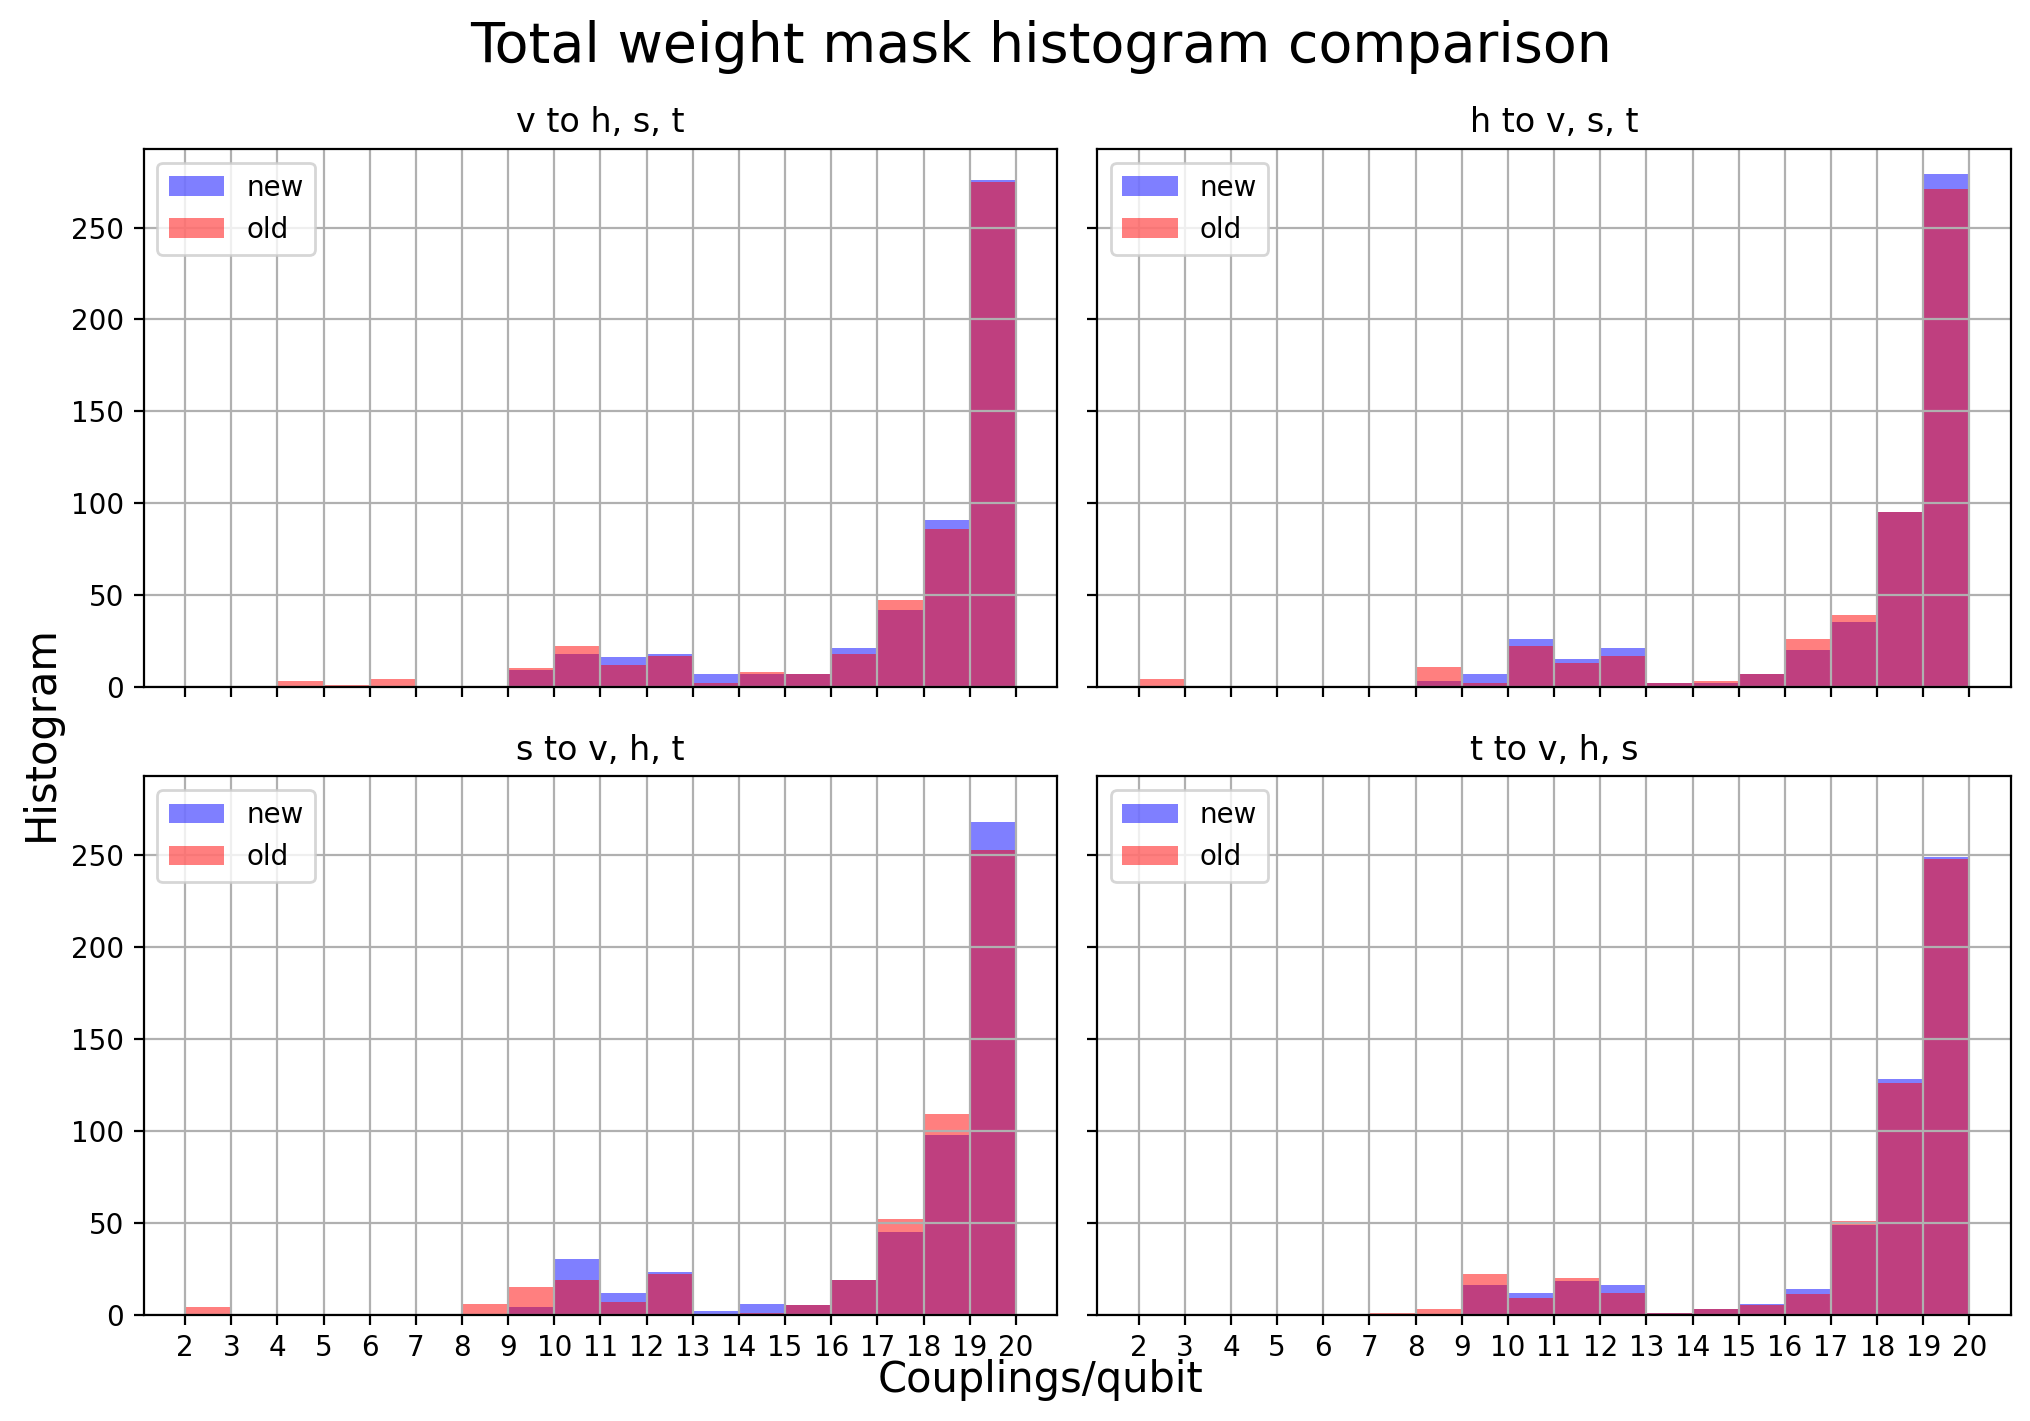

In [16]:
def compute_total_connections(zeph):
    total_v = torch.cat((zeph._weight_mask_dict['01'], zeph._weight_mask_dict['02'], zeph._weight_mask_dict['03']), 1).sum(dim=1).cpu().numpy()
    total_h = torch.cat((zeph._weight_mask_dict['01'].transpose(1,0), zeph._weight_mask_dict['12'], zeph._weight_mask_dict['13']), 1).sum(dim=1).cpu().numpy()
    total_s = torch.cat((zeph._weight_mask_dict['02'].transpose(1,0), zeph._weight_mask_dict['12'].transpose(1,0), zeph._weight_mask_dict['23']), 1).sum(dim=1).cpu().numpy()
    total_t = torch.cat((zeph._weight_mask_dict['03'].transpose(1,0), zeph._weight_mask_dict['13'].transpose(1,0), zeph._weight_mask_dict['23'].transpose(1,0)), 1).sum(dim=1).cpu().numpy()
    return total_v, total_h, total_s, total_t

def plot_total_weights_overlay(new, old):
    fig, axs = plt.subplots(2, 2, figsize=(10, 7), sharey=True, sharex=True, tight_layout=True)
    fig.text(0.5, 0.0, 'Couplings/qubit', ha='center', fontsize=15)
    fig.text(0.0, 0.4, 'Histogram', rotation=90, ha='center', fontsize=15)

    total_new = compute_total_connections(new)
    total_old = compute_total_connections(old)

    all_data = np.concatenate((total_new[0], total_new[1], total_new[2], total_new[3],
                               total_old[0], total_old[1], total_old[2], total_old[3]))
    min_val = int(all_data.min())
    max_val = int(all_data.max())
    bins = np.arange(min_val, max_val + 1, 1)  #

    titles = ["v to h, s, t", "h to v, s, t", "s to v, h, t", "t to v, h, s"]
    
    for i in range(len(titles)):
        ax = axs[i // 2, i % 2]
        data_new = total_new[i]
        data_old = total_old[i]
        ax.hist(data_new, bins=bins, alpha=0.5, label='new', color='blue', align='mid')
        ax.hist(data_old, bins=bins, alpha=0.5, label='old', color='red', align='mid')
        ax.set_xticks(bins)  # Integer ticks
        ax.legend()
        ax.set_title(titles[i])
        ax.grid(True)

    plt.suptitle("Total weight mask histogram comparison", fontsize=20)
    plt.show()


plot_total_weights_overlay(new, old)